In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns     # you can install this with "pip install seaborn"
import sys
import pprint
from process_logs import *  # various functions used to process experiment log file
%matplotlib inline  
#plt.rcParams.update({'font.size': 16})
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

## Settings
Edit the variables below to indicate which plots to generate, the algs list is a list of subdirectories with results (they must contain the file parsed-power-aggregate.txt.

In [5]:
algs = ['MST/output-16epv','MST/output-8epv','MST/output-real','CC/output-16epv','CC/output-8epv','CC/output-real']
algs = ['MST/output-8epv-new','MST/output-real-new']
#algs = ['CC/output-8epv','CC/output-real']
whats = {'Energy':'Total CPU Energy (J)','Power':'Average CPU Power (W)', 'Memory':'Total Memory (GB)','Time':'Time (seconds)'}
#whats = {'Power':'Average CPU Power (W)'}
epvs = ['8']
nws = ['ER','G']
#nws = ['com-lj-org-weighted','soc-pokec','youtubeNetwork']
insperc = ['100','75']

## Functions
A couple of functions that extract the data and generate the plots.

In [10]:
def genBoxPlot(alg, what, ddf, network):
    # df should be for a single network
    global whats
    print(alg,what,network)
    if ddf.empty: 
        print(': No data'); 
        return
     
    df=ddf[ddf['what'].str.contains(what)].copy()
    #print(df.head(100))
    df['what'].replace(what,whats[what])
    df.sort_values(by=['Threads'],inplace=True)
    
    parts = network.split('_')
    if what != "Memory":
        if what == "Time":
            value_vars = [alg+'-ins-pkg0']
            if not parts[2].startswith('100'): value_vars += [alg + '-del-pkg0']
            value_vars += ['Galois-pkg0']
        else: 
            value_vars = [alg+'-ins-pkg0',alg+'-ins-pkg1']
            if not parts[2].startswith('100'): value_vars += [alg + '-del-pkg0', alg+'-del-pkg1']
            value_vars += ['Galois-pkg0','Galois-pkg1']
    else:
        value_vars = [alg+'-Memory','Galois-Memory']
    if what == "Power": value_vars.append("Baseline")
    
    dd=pd.melt(df, id_vars=['Threads'], value_vars=value_vars, var_name='Operation')
   
    fig, ax = plt.subplots()
    fig.set_size_inches(8,6)
    
    #ax = sns.barplot(ax=ax,x='Threads',y='value',data=dd,hue='Operation',palette="Set3")
    if what == "Time":
        sns.pointplot(x='Threads',y='value',data=dd,hue='Operation', ax=ax, markers=["^", "1","*",'.'],
                      linestyles=["-", "--", ":",'-.']) 
    else:
        #sns.boxplot(x='Threads',y='value',data=dd,hue='Operation', ax=ax) 
        sns.pointplot(x='Threads',y='value',data=dd,hue='Operation',palette="Paired", ci=None,
                  markers=['.','^', '1','*','x','+','o'], linestyles=["-", "--", ":",'-.','-',':',' '])
    sns.despine(offset=10, trim=True)
    ax.patch.set_alpha(0.5)
    ax.set(xlim=(0, None))
    plt.xlabel("Number of Threads")
    plt.ylabel(whats[what])

    filename = network + "_" + what + '.pdf'
    title = network + ": " +whats[what]
    plt.title(title)
    plt.savefig(filename)
    plt.show()

## Driver for generating all the plots
All the data structures are populated by extractData and plots are generated with genBoxPlot

('MST', 'Energy', '248_ER_100i_1000000')


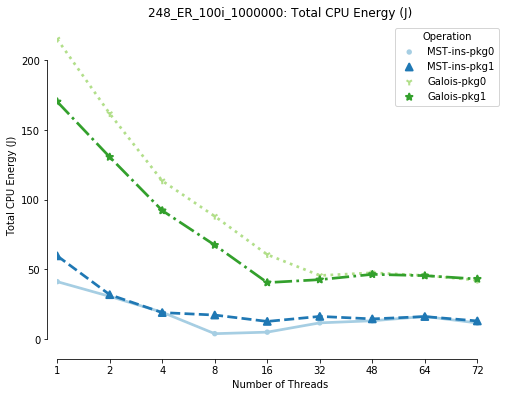

('MST', 'Energy', '248_ER_75i_1000000')


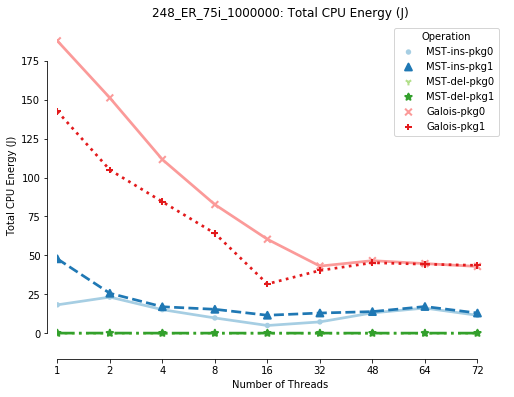

('MST', 'Energy', '248_G_75i_1000000')


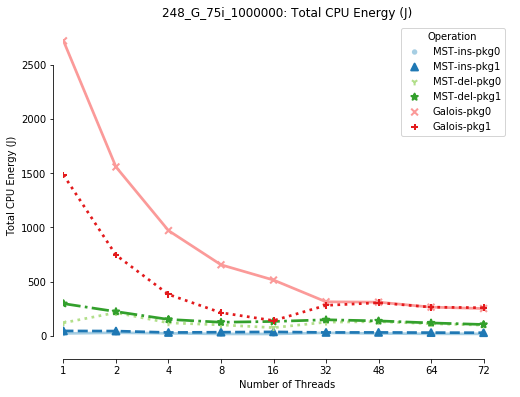

('MST', 'Energy', '248_G_100i_1000000')


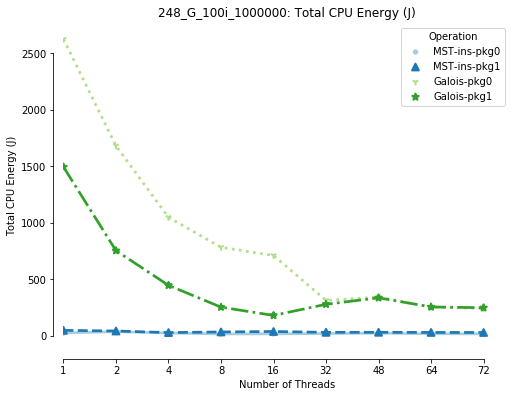

('MST', 'Time', '248_ER_100i_1000000')


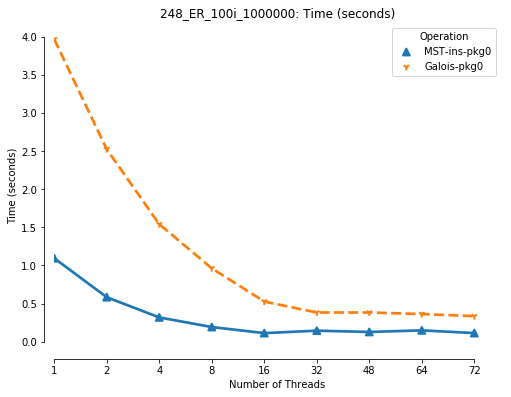

('MST', 'Time', '248_ER_75i_1000000')


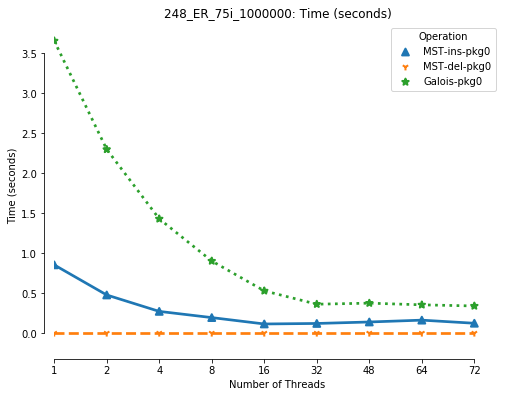

('MST', 'Time', '248_G_75i_1000000')


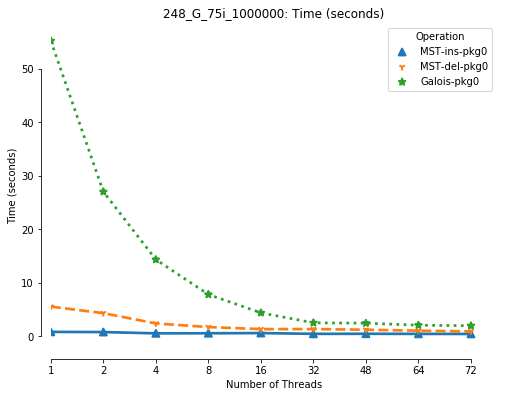

('MST', 'Time', '248_G_100i_1000000')


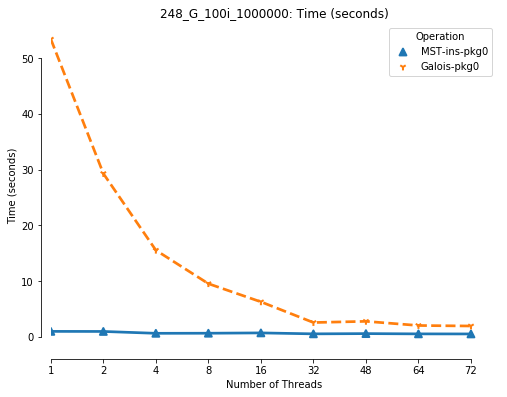

('MST', 'Power', '248_ER_100i_1000000')


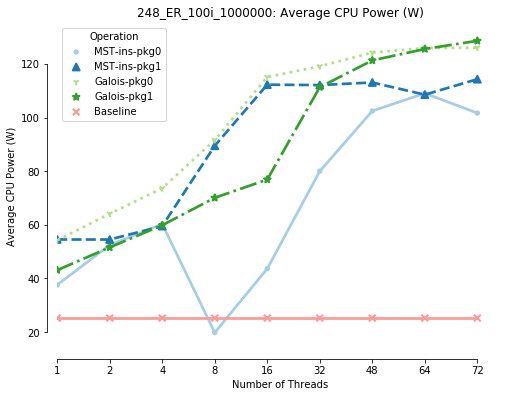

('MST', 'Power', '248_ER_75i_1000000')


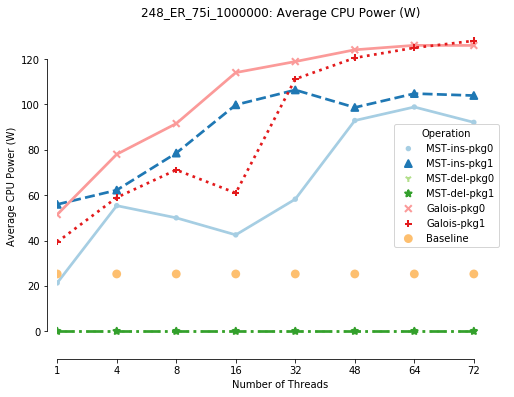

('MST', 'Power', '248_G_75i_1000000')


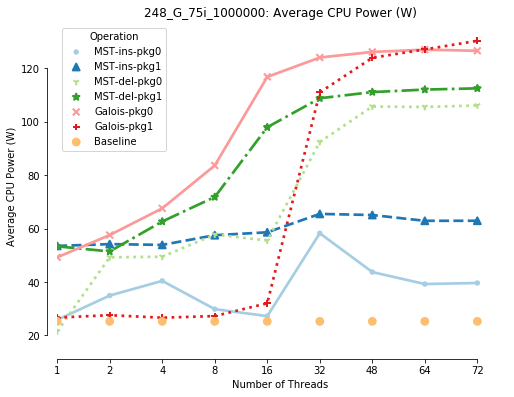

('MST', 'Power', '248_G_100i_1000000')


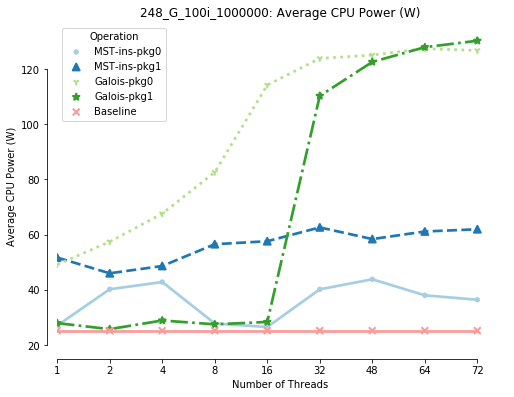

('MST', 'Memory', '248_ER_100i_1000000')


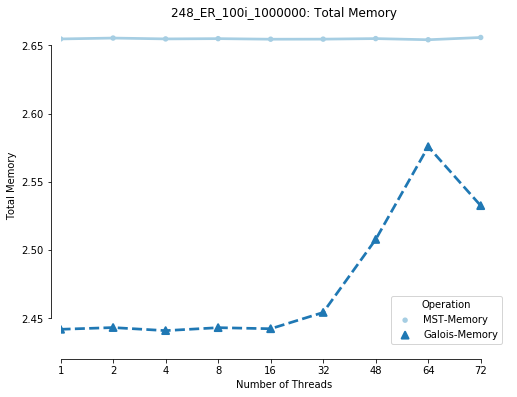

('MST', 'Memory', '248_ER_75i_1000000')


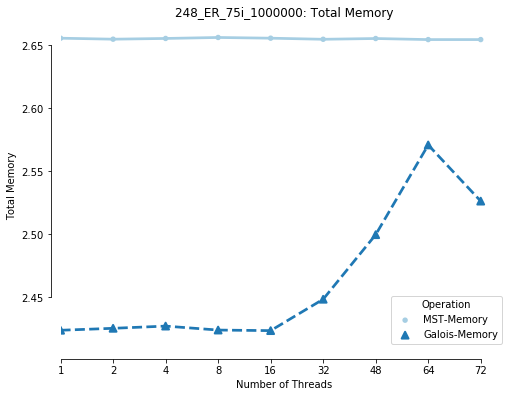

('MST', 'Memory', '248_G_75i_1000000')


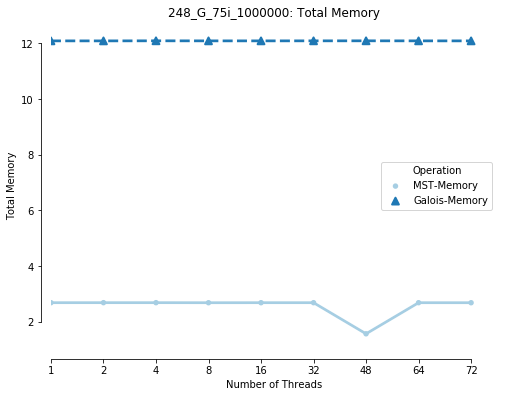

('MST', 'Memory', '248_G_100i_1000000')


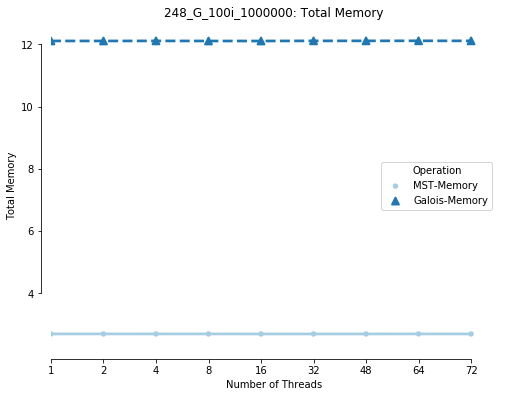

('MST', 'Energy', 'youtubeNetwork_100i_1000000')


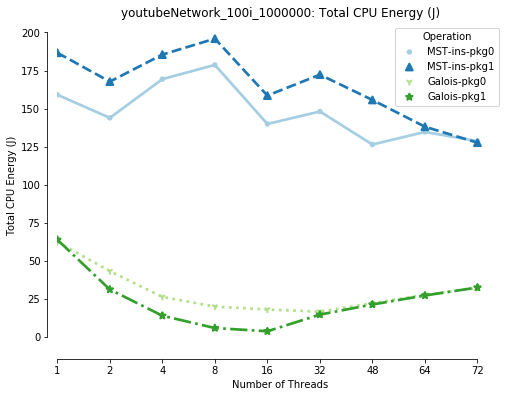

('MST', 'Energy', 'youtubeNetwork_75i_1000000')


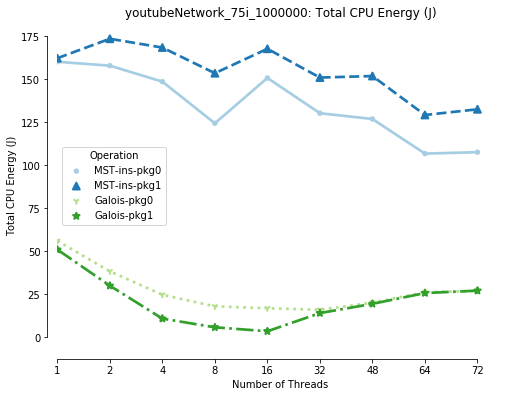

('MST', 'Energy', 'com-lj-org-weighted_100i_1000000')


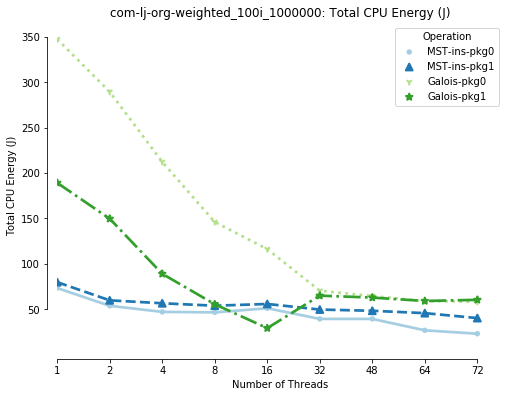

('MST', 'Energy', 'soc-pokec_100i_1000000')


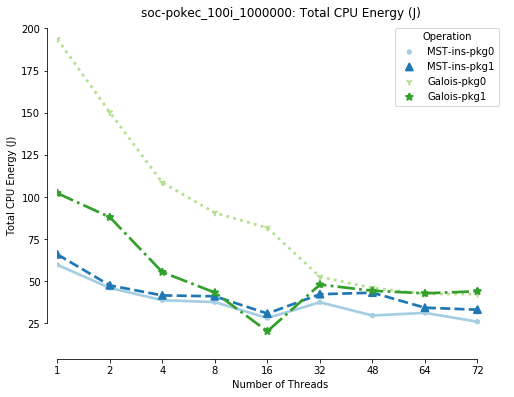

('MST', 'Energy', 'soc-pokec_75i_1000000')


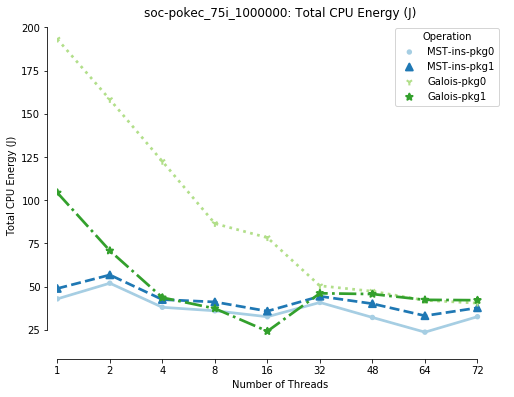

('MST', 'Energy', 'com-lj-org-weighted_75i_1000000')


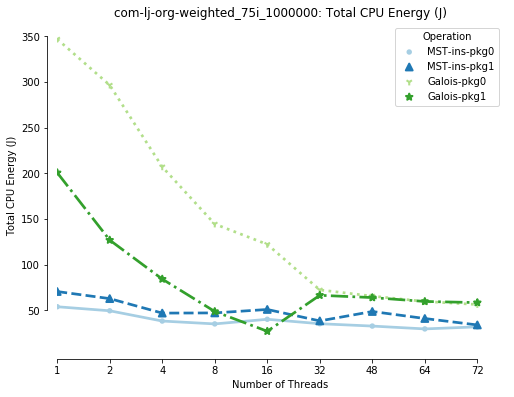

('MST', 'Time', 'youtubeNetwork_100i_1000000')


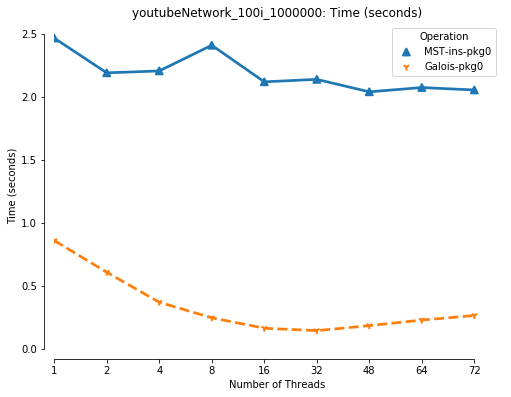

('MST', 'Time', 'youtubeNetwork_75i_1000000')


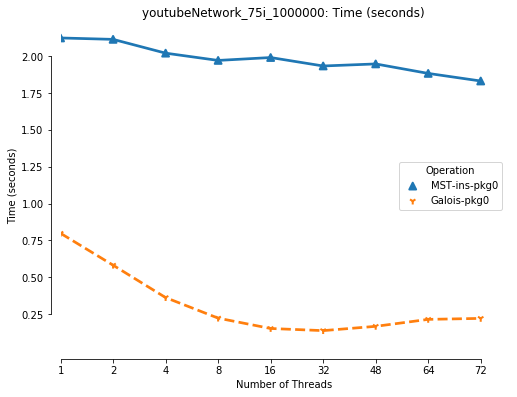

('MST', 'Time', 'com-lj-org-weighted_100i_1000000')


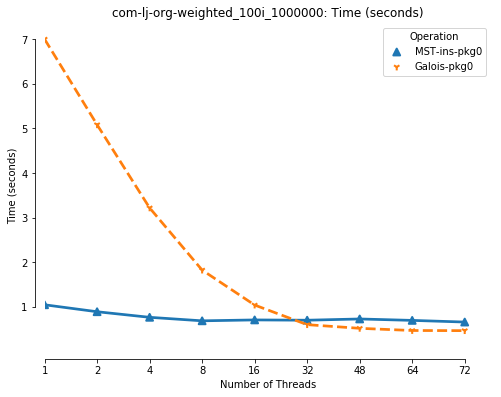

('MST', 'Time', 'soc-pokec_100i_1000000')


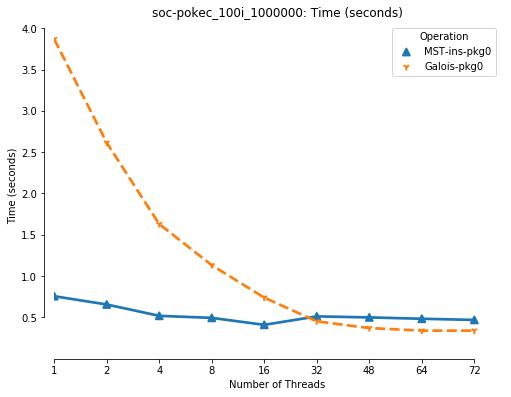

('MST', 'Time', 'soc-pokec_75i_1000000')


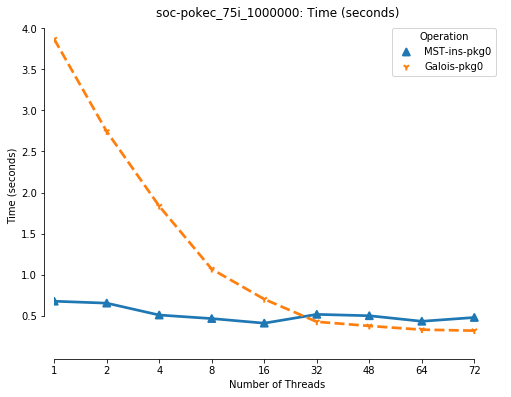

('MST', 'Time', 'com-lj-org-weighted_75i_1000000')


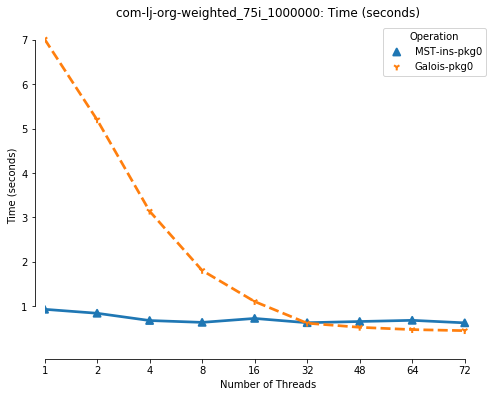

('MST', 'Power', 'youtubeNetwork_100i_1000000')


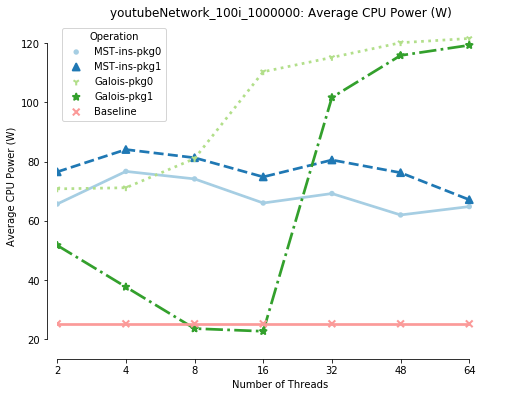

('MST', 'Power', 'youtubeNetwork_75i_1000000')


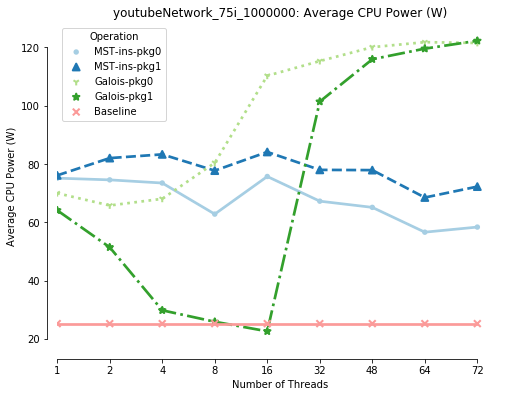

('MST', 'Power', 'com-lj-org-weighted_100i_1000000')


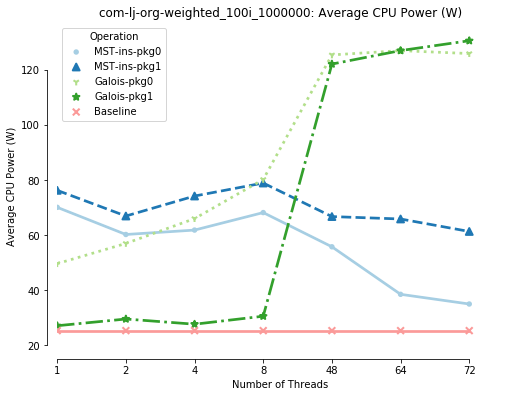

('MST', 'Power', 'soc-pokec_100i_1000000')


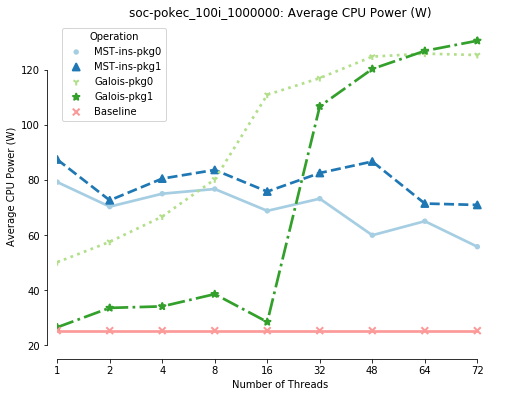

('MST', 'Power', 'soc-pokec_75i_1000000')


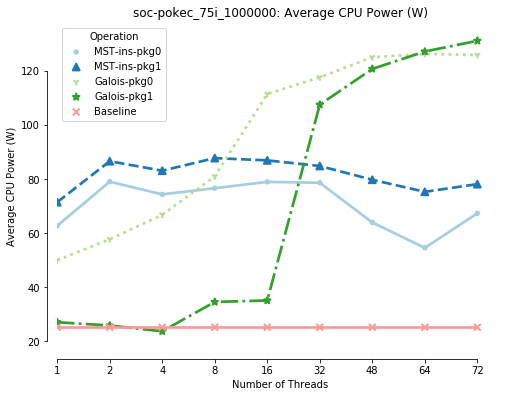

('MST', 'Power', 'com-lj-org-weighted_75i_1000000')


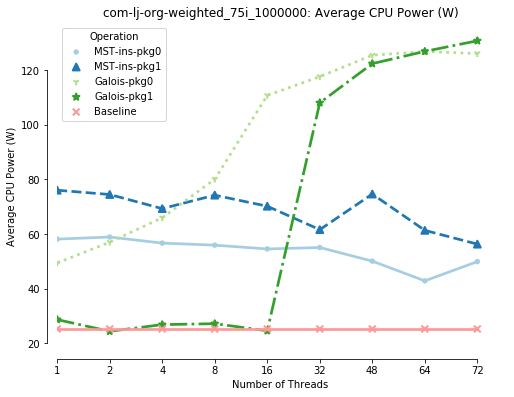

('MST', 'Memory', 'youtubeNetwork_100i_1000000')


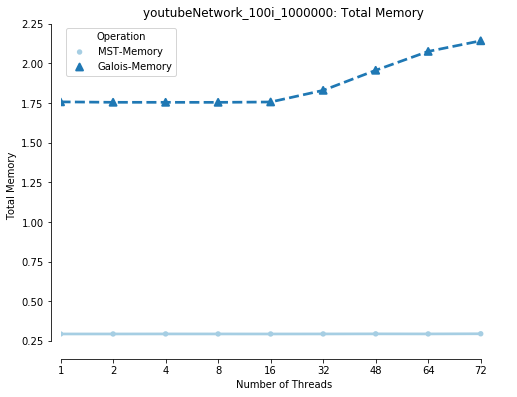

('MST', 'Memory', 'youtubeNetwork_75i_1000000')


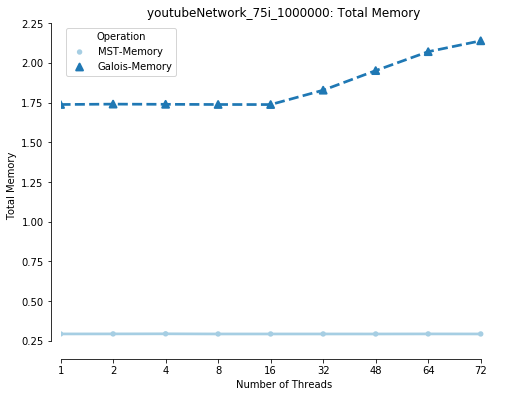

('MST', 'Memory', 'com-lj-org-weighted_100i_1000000')


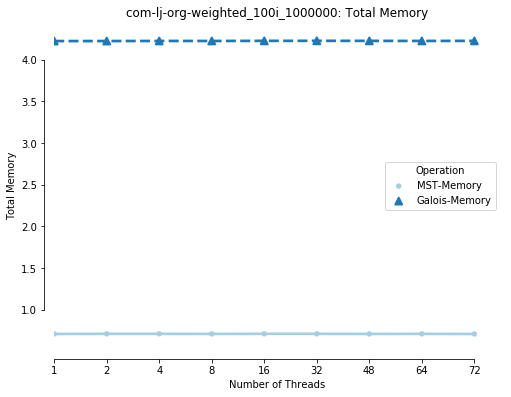

('MST', 'Memory', 'soc-pokec_100i_1000000')


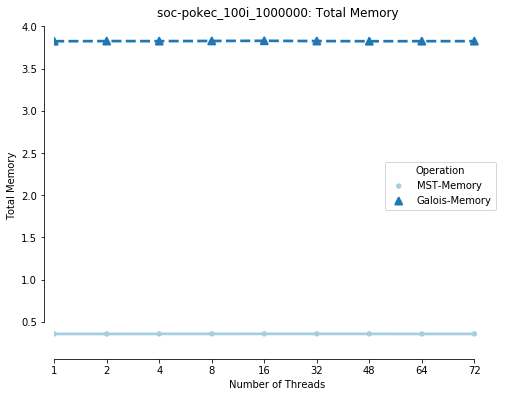

('MST', 'Memory', 'soc-pokec_75i_1000000')


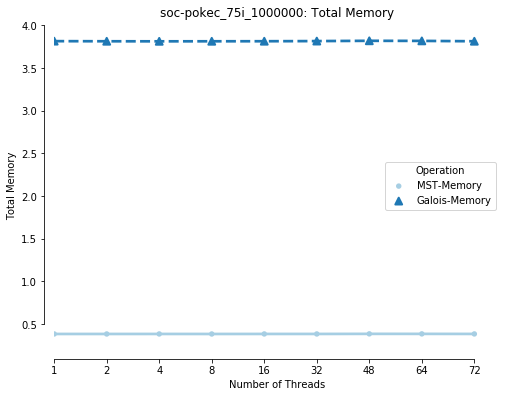

('MST', 'Memory', 'com-lj-org-weighted_75i_1000000')


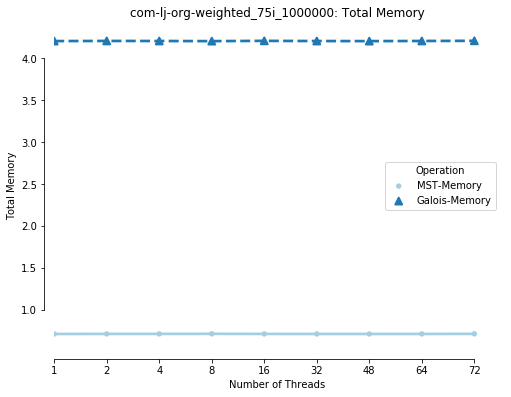

In [11]:
algnames = [x.split('/')[0] for x in algs]
pp = pprint.PrettyPrinter(indent=2)

for algfull in algs:
    alg = algfull.split('/')[0]
    networks = processLogs(algfull)
    allnets = []
    summaries = []
    columns = ["what","Network", "Threads", alg+"-ins-pkg0", alg+"-ins-pkg1", 
                alg+"-del-pkg0", alg+"-del-pkg1", 'Galois-pkg0','Galois-pkg1',
                alg + "-Memory","Galois-Memory","Baseline"]

    df = pd.DataFrame(columns = columns)
    for n in networks.values():
        #print(n)
        for what in whats.keys():
            summary = n.summarize(what)
            summaries.append(summary)
            threads= summary['Threads']
            network = '_'.join(summary['Experiment'].split('_')[:-1])
            if network not in allnets: allnets.append(network)
            
            vals = [what, network, int(threads), 
                    np.mean(summary['Insertion-pkg0']), np.mean(summary['Insertion-pkg1']), 
                    np.mean(summary['Deletion-pkg0']), np.mean(summary['Deletion-pkg1']), 
                    np.mean(summary['Galois-pkg0']), np.mean(summary['Galois-pkg1']), 
                    np.mean(summary['Memory']), np.mean(summary['Galois-mem'])]
            if what == "Power": vals.append(baseline_power)
            else: vals.append(float('NaN'))
               
            df2 = pd.DataFrame([ vals ], columns=columns)
            df = df.append(df2, ignore_index=True).fillna(0)
            for col in [alg+"-del-pkg1"]:
                #q = df[col].quantile(0.99)
                df = df[df[col] < 600]
                pass
            
    df.index.name='id'
    
    for what in whats.keys():
        for network in allnets: 
            currentdf = df[df['Network'].str.contains(network)]
            genBoxPlot(alg,what,currentdf,network)
